In [3]:
pip install pandas

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/11.6 MB 12.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.9/11.6 MB 13.5 MB/s eta 0:00:01
   ------- -------------------------------- 2.3/11.6 MB 24.5 MB/s eta 0:00:01
   -------------------- ------------------- 6.1/11.6 MB 42.8 MB/s eta 0:00:01
   --------------------------------- ------ 9.6/11.6 MB 55.7 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 93.0 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 81.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------------- -------------------------- 4.3/12.9 MB 91.3 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mcmig\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd


In [5]:
marketing = pd.read_csv('./marketing.csv')

In [6]:
# a) Imprima as primeiras 5 linhas do DatFrame marketing
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [7]:
# b) Imprima um resumo estatístico de todas as colunas do DataFrame marketing
print(marketing.describe(include='all'))

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [8]:
# Imprima tipos de dados das colunas e a quantidade de valores não-nulos por coluna
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


In [9]:
# Tipos de dados de uma coluna
print(marketing['converted'].dtype)

object


In [10]:
# marketing['converted']
marketing['converted'] = marketing.converted.astype('bool')

In [13]:
print(marketing['converted'].dtype)

bool


In [11]:
import numpy as np

In [14]:
# criando novas colunas tipo bool
marketing['is_house_ads'] = np.where(marketing['marketing_channel']== 'HouseAds', 'true', 'false')

In [15]:
channel_dict = {"house Ads": 1,
                "Instagram": 2,
                "Facebook": 3,
                "Email": 4,
                "Push": 5}
marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)

print(marketing['channel_code'].head(3))

0   NaN
1   NaN
2   NaN
Name: channel_code, dtype: float64


In [16]:
marketing = pd.read_csv('marketing.csv',
                        parse_dates=['date_served',
                                     'date_subscribed',
                                     'date_canceled'])

C:\Users\mcmig\AppData\Local\Temp\ipykernel_19184\1691865163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',
C:\Users\mcmig\AppData\Local\Temp\ipykernel_19184\1691865163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',
C:\Users\mcmig\AppData\Local\Temp\ipykernel_19184\1691865163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',


In [18]:
marketing['date_served'] = pd.to_datetime(
    marketing['date_served']
)

In [19]:
marketing['day_served']= marketing['date_served'].dt.dayofweek

In [20]:
print(marketing['is_retained'].dtype)

object


In [21]:
marketing['is_retained'] = marketing['is_retained'].astype('bool')

In [22]:
print(marketing['is_retained'].dtype)

bool


In [23]:
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

In [24]:
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [25]:
import numpy as np

In [26]:
marketing['is_correct_lang'] = np.where(marketing['subscribing_channel'] == 'Instagram', 1, 0)

In [27]:
import pandas as pd

In [28]:
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

C:\Users\mcmig\AppData\Local\Temp\ipykernel_19184\3302014625.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
C:\Users\mcmig\AppData\Local\Temp\ipykernel_19184\3302014625.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
C:\Users\mcmig\AppData\Local\Temp\ipykernel_19184\3302014625.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('mark

In [29]:
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek


In [31]:
daily_users = marketing.groupby('date_served')['user_id'].unique()

print(daily_users)

date_served
2018-01-01    [a100000029, a100000030, a100000031, a10000003...
2018-01-02    [a100000045, a100000046, a100000047, a10000004...
2018-01-03    [a100000062, a100000063, a100000064, a10000006...
2018-01-04    [a100000080, a100000081, a100000082, a10000008...
2018-01-05    [a100000096, a100000097, a100000098, a10000009...
2018-01-06    [a100000129, a100000130, a100000131, a10000013...
2018-01-07    [a100000165, a100000166, a100000167, a10000016...
2018-01-08    [a100000261, a100000262, a100000263, a10000026...
2018-01-09    [a100000277, a100000278, a100000279, a10000028...
2018-01-10    [a100000297, a100000298, a100000299, a10000030...
2018-01-11    [a100000318, a100000339, a100000360, a10000038...
2018-01-12    [a100000319, a100000340, a100000361, a10000038...
2018-01-13    [a100000320, a100000341, a100000362, a10000038...
2018-01-14    [a100000321, a100000342, a100000363, a10000038...
2018-01-15    [a100000322, a100000343, a100000364, a10000038...
2018-01-16    [a100000323, a

In [37]:
pip install matplotlib

     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ----------- --------------------------- 30.7/104.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 104.0/104.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.4/8.1 MB 12.2 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.1 MB 24.4 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 48.0 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 57.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 57.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/219.8 kB ? eta -:--:--
   --------------------------------------- 219.8/219.8 kB 13.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 146.0 MB/s eta 0:00:00
   ------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mcmig\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


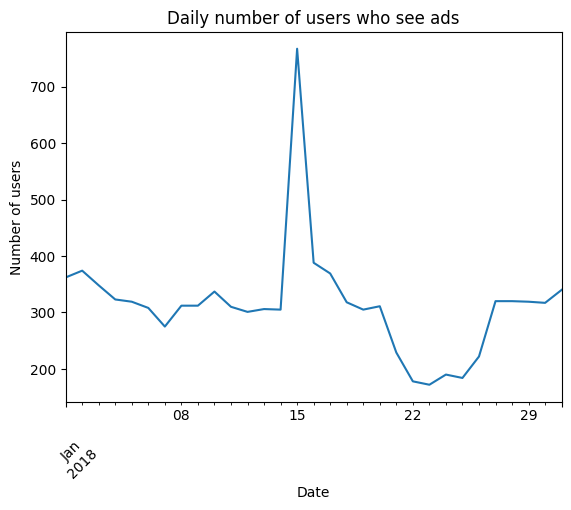

In [ ]:
import matplotlib.pyplot as plt

daily_users = marketing.groupby('date_served')['user_id'].unique()


daily_user_count = daily_users.apply(len)

daily_user_count.plot()

plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation=45)

plt.show()